In [2]:
import csv
import urllib
import io
import numpy as np 
from scipy.optimize import curve_fit 
from matplotlib import pyplot as plt 
import datetime

In [3]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
response = urllib.request.urlopen(url)
reader = csv.DictReader(io.TextIOWrapper(response))

In [4]:
data = {}
for row in reader:
    temp = []
    for entry in row:
        if "/20" in entry and row[entry] is not "":
            temp.append(((datetime.datetime.strptime(entry, '%m/%d/%y')), int(row[entry])))
    if row["Province/State"] != "":
        data[row["Province/State"]] = temp
    else:
        data[row["Country/Region"]] = temp

[ 2.99888990e-05 -3.21223101e-03  1.20199557e-01 -1.84805970e+00
  1.03020193e+01 -1.13372854e+01]


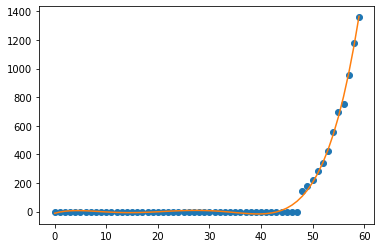

In [16]:
x = [x[0] for x in data["California"]]
y = [x[1] for x in data["California"]]

idx = list(range(0, len(x)))
fit = np.polyfit(idx, y, 5)
print(fit)

f = np.polyval(fit, idx)
plt.plot(idx, y, "o")
plt.plot(idx, f)